In [1]:
import pandas as pd
import numpy as np

dataset = r'Bank customer details.xlsx'

df = pd.ExcelFile(dataset)

df.sheet_names

['Customer', 'Accounts', 'Loan', 'Transaction', 'Transaction time']

In [2]:
accounts = pd.read_excel(df, sheet_name = 'Accounts')
accounts.head()

,Customer_id,Account Number,City id,Account_Open_Date,Account Type,Account officer,Opening Balance
0,NZ48905,909028330,Riv-HR001,2012-05-25,Joint,Mark Montgomery,"291120,6408"
1,NZ80436,827410722,Lag-HR001,2008-05-25,Savings,Benjamin Kim,"132696,4716"
2,NZ59205,22623932,Del-HR001,1999-05-24,Joint,Todd Roberts,"207771,2832"
3,NZ87441,48126440,Kog-HR001,2012-05-25,Current,Shawn Cook,"253649,8125"
4,NZ45102,826302558,Enu-HR001,2019-05-24,Corporate,Paul Holmes,"43815,1168"


In [3]:
loans = pd.read_excel(df, sheet_name = 'Loan')
loans.head()

,Customer_id,Account Number,City id,Bank Loans
0,NZ87901,285351921,Kog-HR001,N4116633003
1,NZ59380,919496575,Abu-HR001,N2660428992
2,NZ96496,238274446,Abu-HR001,N9237412968
3,NZ33044,206071219,Enu-HR001,"N150301,08"
4,NZ75060,46822267,Riv-HR001,N224641419


In [4]:
#cleaning accounts and loan

#remove duplicate
accounts_clean = accounts.drop_duplicates()
loans_clean = loans.drop_duplicates()

#handle missing values
accounts_clean = accounts.dropna()
loans_clean = loans.dropna()

print('Accounts Cleaned')
print(accounts_clean.head())
print('Loans Cleaned')
print(loans_clean.head())

Accounts Cleaned
  Customer_id  Account Number    City id Account_Open_Date Account Type  \
0     NZ48905       909028330  Riv-HR001        2012-05-25        Joint   
1     NZ80436       827410722  Lag-HR001        2008-05-25      Savings   
2     NZ59205        22623932  Del-HR001        1999-05-24        Joint   
3     NZ87441        48126440  Kog-HR001        2012-05-25      Current   
4     NZ45102       826302558  Enu-HR001        2019-05-24    Corporate   

   Account officer Opening Balance  
0  Mark Montgomery     291120,6408  
1     Benjamin Kim     132696,4716  
2     Todd Roberts     207771,2832  
3       Shawn Cook     253649,8125  
4      Paul Holmes      43815,1168  
Loans Cleaned
  Customer_id  Account Number    City id   Bank Loans
0     NZ87901       285351921  Kog-HR001  N4116633003
1     NZ59380       919496575  Abu-HR001  N2660428992
2     NZ96496       238274446  Abu-HR001  N9237412968
3     NZ33044       206071219  Enu-HR001   N150301,08
4     NZ75060        46822

In [5]:
#2. Duplicate the Customer worksheet and rename it to “All_customer_details”

In [6]:
#customers worksheet
customers = pd.read_excel(df, sheet_name = 'Customer')

#duplicate customers to all customers details
all_customer_details = customers.copy()

# Ensure all values are strings before cleaning
all_customer_details['Bank Deposit'] = all_customer_details['Bank Deposit'].astype(str).str.replace('_x0002_', '').str.replace(',', '')
all_customer_details['Saving Accounts'] = all_customer_details['Saving Accounts'].astype(str).str.replace(' ', '').str.replace(',', '')

# Convert the cleaned columns to numeric, handling errors by coercing non-numeric values to NaN
all_customer_details['Bank Deposit'] = pd.to_numeric(all_customer_details['Bank Deposit'], errors='coerce')
all_customer_details['Saving Accounts'] = pd.to_numeric(all_customer_details['Saving Accounts'], errors='coerce')


In [7]:
#merging with account
all_customer_details = all_customer_details.merge(accounts_clean[
                                                  ['Customer_id', 
                                                   'Account Type', 
                                                  'Opening Balance']
                                                  ], 
                                                  on = 'Customer_id', how = 'left'
                                                 )

#merging with loan
all_customer_details = all_customer_details.merge(loans_clean[
                                                  ['Customer_id', 
                                                  'Bank Loans']
                                                  ], 
                                                  on='Customer_id', how='left'
                                                 )

#transaction worksheet
transaction = pd.read_excel(df, sheet_name = 'Transaction')

#merging with transaction
all_customer_details = all_customer_details.merge(transaction[
                                                  ['Account Number', 
                                                   'Date_of_transaction', 
                                                   'Transaction type', 
                                                   'Transaction Medium']
                                                  ], 
                                                  on='Account Number', how='left'
                                                 )

print(all_customer_details.head())

  Customer_id  Account Number  Age       Date of Birth     Sex  \
0     NZ78803       719704224   23 1999-05-25 06:00:00  Female   
1     NZ33202       131217921   32 1990-05-25 00:00:00  Female   
2     NZ82919        17250555   80 1942-05-25 00:00:00  Female   
3     NZ57563       255183298   33 1989-05-24 18:00:00  Female   
4     NZ59334       600576973   85 1937-05-24 18:00:00  Female   

                      Occupation   City  Bank Deposit  Saving Accounts  \
0    Computer Systems Analyst II  Lagos  4.559237e+05    228189.805043   
1             Help Desk Operator  Lagos  7.446290e+05    206014.030924   
2                Web Designer IV  Lagos  1.280759e+05    142091.734445   
3                Statistician II  Lagos  3.056394e+06    737637.187529   
4  Budget/Accounting Analyst III  Lagos  5.498142e+05    223400.906696   

        Full name Unnamed: 10 Account Type Opening Balance   Bank Loans  \
0  Charles Martin         NaN  Domiciliary      98188,9467          NaN   
1    Ern

In [8]:
#3 the difference between Current_deposit and Saving_deposit

In [9]:



all_customer_details['Balance'] = all_customer_details['Bank Deposit'] - all_customer_details['Saving Accounts']

print(all_customer_details[['Bank Deposit', 'Saving Accounts', 'Balance']].head())

   Bank Deposit  Saving Accounts       Balance
0  4.559237e+05    228189.805043  2.277339e+05
1  7.446290e+05    206014.030924  5.386150e+05
2  1.280759e+05    142091.734445 -1.401585e+04
3  3.056394e+06    737637.187529  2.318757e+06
4  5.498142e+05    223400.906696  3.264133e+05


In [10]:
#Reward customers
all_customer_details['Reward'] = all_customer_details['Bank Deposit'].apply(lambda x: x * 1.02 if x > 500000 else x)

print(all_customer_details[['Bank Deposit', 'Reward']].head())

   Bank Deposit        Reward
0  4.559237e+05  4.559237e+05
1  7.446290e+05  7.595216e+05
2  1.280759e+05  1.280759e+05
3  3.056394e+06  3.117522e+06
4  5.498142e+05  5.608104e+05


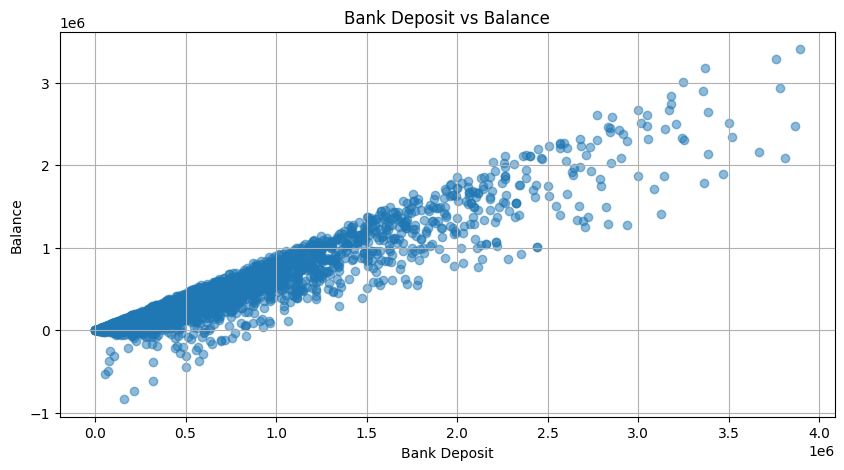

In [11]:
import matplotlib.pyplot as plt

# Plotting Current_deposit vs Balance
plt.figure(figsize = (10, 5))
plt.scatter(all_customer_details['Bank Deposit'], all_customer_details['Balance'], alpha=0.5)
plt.title('Bank Deposit vs Balance')
plt.xlabel('Bank Deposit')
plt.ylabel('Balance')
plt.grid(True)
plt.show()